# Model validation

In [14]:
# Imports
import os
import cv2
import glob
import pickle
import pandas as pd
import numpy as np
from utils import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [15]:
# Load data
df = pd.read_csv("../data/color_data.csv")

# Encode categorical labels
labelencoder = LabelEncoder() 
df['Class'] = labelencoder.fit_transform(df['Class'])

# Load model
filename = '../data/model.sav'
model = pickle.load(open(filename, 'rb'))

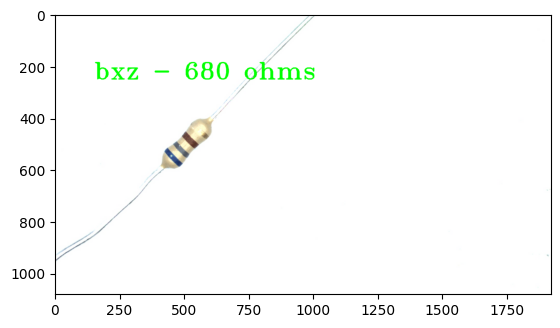

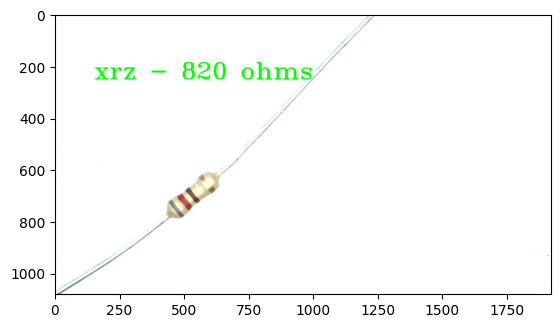

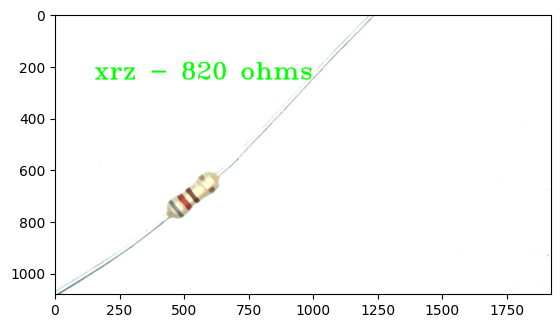

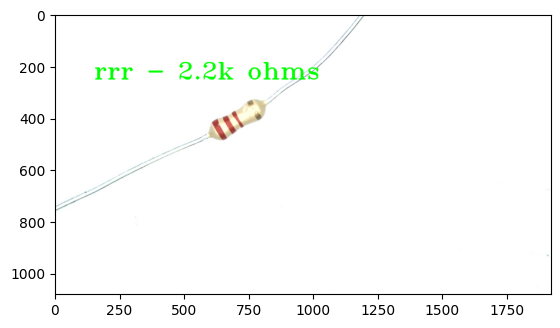

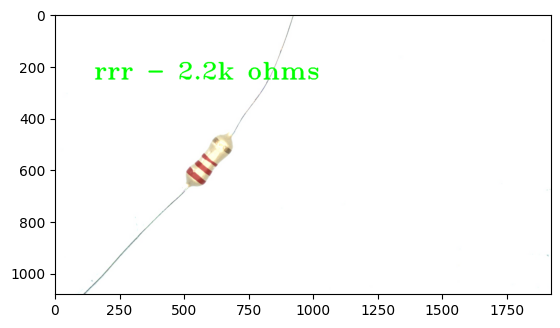

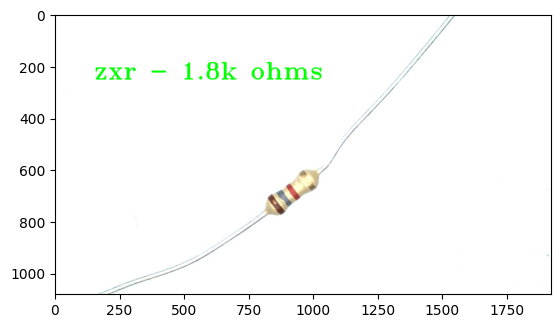

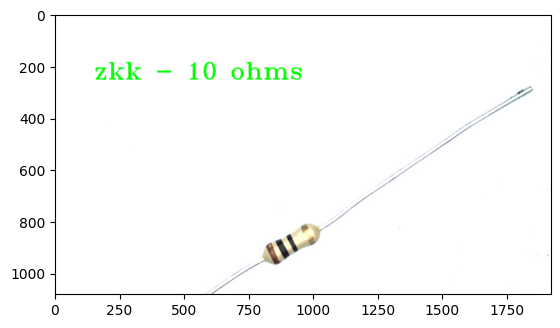

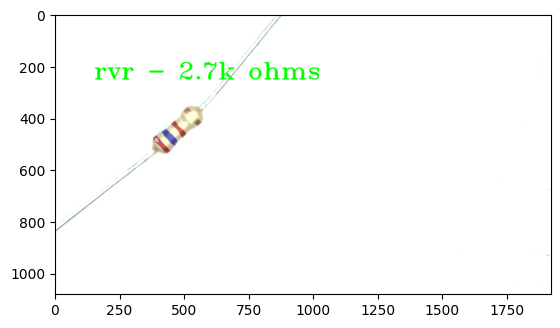

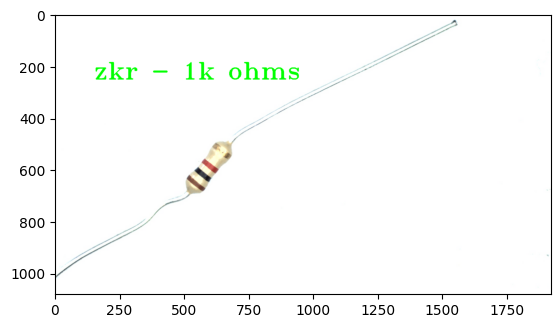

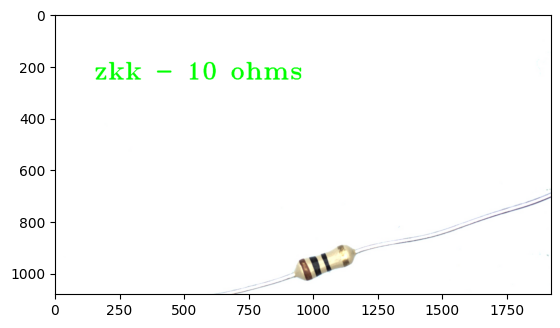

In [16]:
# Accuracy
correct = 0

# Loop over every image
for i in glob.glob('../data/resistor_images/*jpg'):

	# Read image
	image = cv2.imread(i)

	# Read label
	label = i.split('_')[-1][0:3]

	# Extract color band contours
	bands = extract_color_bands(image)

	# Iterate over first three contours
	prediction = ''
	for j, band in enumerate(bands):

		# Predict
		pred = model.predict([band])

		# Convert to class
		prediction += labelencoder.inverse_transform(pred)[0]

	# Draw text
	if len(prediction) == 3:

		# Accuracy
		if prediction == label: correct += 1

		# Plot text
		cv2.putText(image, text=prediction + " - " + decode(prediction), org=(150, 250), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)
	
	# Show
	if correct % 20 == 0:
		plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
		plt.show()

In [17]:
# Compute accuracy
print("Accuracy: " + str(correct/len(os.listdir("../data/resistor_images"))*100) + ' %')

Accuracy: 100.0 %
